# admcycles - The Old and The New
## Overview
* The Motivation: Intersection theory on the moduli space of curves
* The Old: How to use admcycles
* The New: Developments during the last year

## How to get access
Website : [https://gitlab.com/modulispaces/admcycles](https://gitlab.com/modulispaces/admcycles)<br>
Online tool : [https://cocalc.com](https://cocalc.com)<br>
User manual : [https://msp.org/jsag/2021/11-1/p10.xhtml](https://msp.org/jsag/2021/11-1/p10.xhtml)

## The Motivation: Intersection theory on the moduli space of curves
The SageMath package ``admcycles`` is a tool for studying the [moduli space of stable curves](https://en.wikipedia.org/wiki/Moduli_of_algebraic_curves), denoted $\overline{\mathcal{M}}_{g,n}$. It was introduced by [[Deligne, Mumford - 1969](https://doi.org/10.1007%2FBF02684599)] and it is a parameter space for tuples $(C, p_1, \ldots, p_n)$ of
* an algebraic curve/Riemann surface $C$ of some fixed genus $g$, possibly with nodal singularities,
* distinct (smooth) marked points $p_1, \ldots, p_n \in C$.

Here is an illustration of $\overline{\mathcal{M}}_{3,2}$:
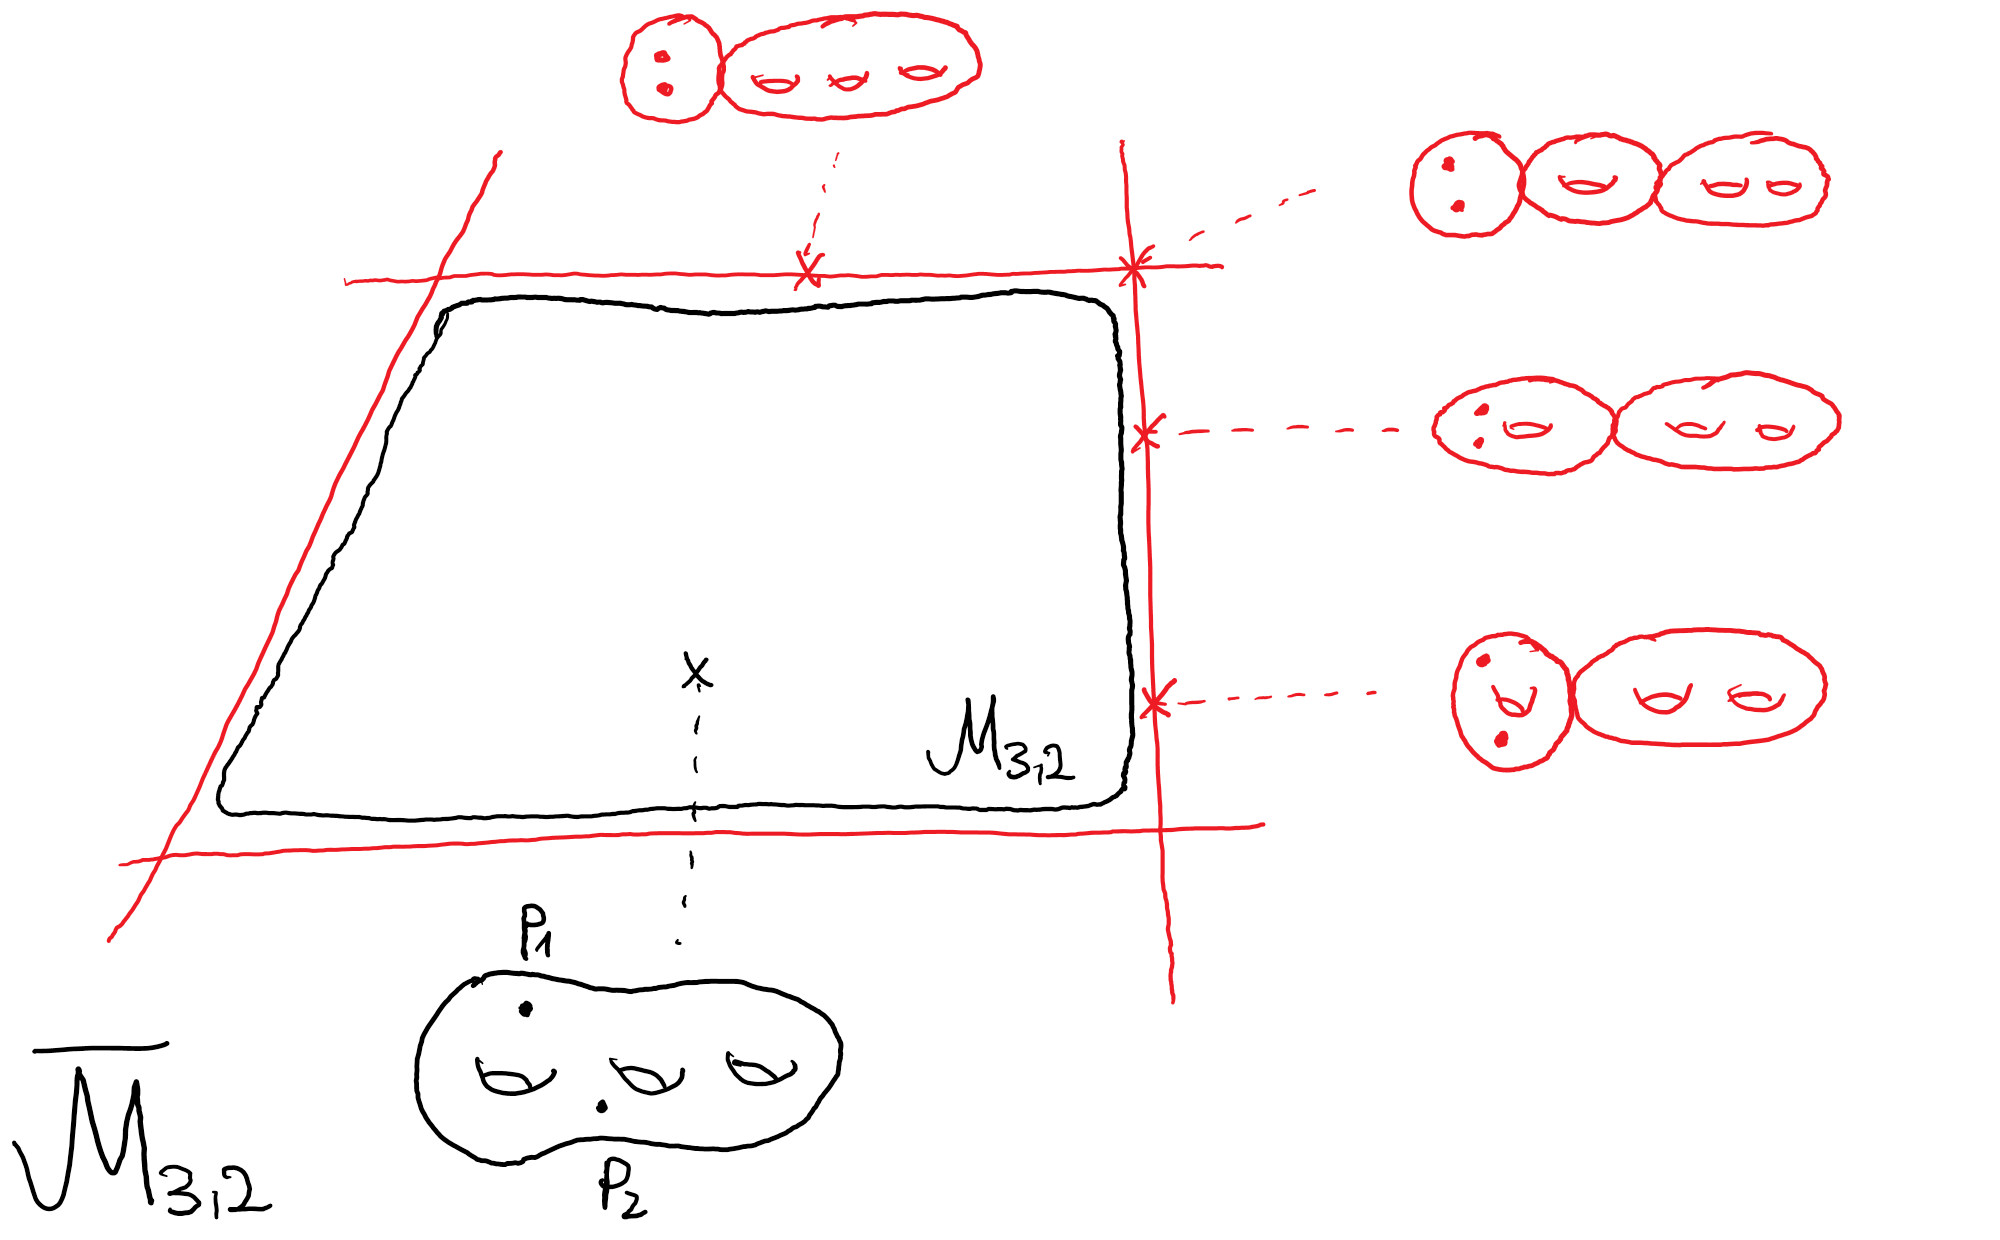

Nice properties:
- The space $\overline{\mathcal{M}}_{g,n}$ is a smooth, compact complex orbifold of dimension $\dim_\mathbb{C} \overline{\mathcal{M}}_{g,n} = 3g-3+n$.
- The subset $\mathcal{M}_{g,n}$ where the curve $C$ is smooth is dense and open and the complement $\partial \overline{\mathcal{M}}_{g,n}$ is a normal-crossing divisor.

With ``admcycles`` we can study the **intersection theory** of $\overline{\mathcal{M}}_{g,n}$, which basically means the singular cohomology groups $H^*(\overline{\mathcal{M}}_{g,n})$ and their subrings given by **tautological classes**.

## The Old: How to use admcycles
### Examples of tautological classes
Let's start with the **cotangent line bundles** $\mathcal{L}_i$ on $\overline{\mathcal{M}}_{g,n}$ (for $i = 1, \dots, n$) defined by
$$
 \qquad \mathcal{L}_i|_{(C, p_1, \ldots, p_n)} = T^*_{p_i}(C)
$$
whose fiber over a smooth curve is the cotangent space at the marked point $i$. 

The first Chern classes of the $\mathcal{L}_i$ are referred to as **$\psi$-classes**:

$$
\psi_1 := c_1(\mathcal{L}_1),\;  \dots, \; \psi_n := c_1(\mathcal{L}_n) \; \in H^2(\overline{\mathcal{M}}_{g,n}).
$$


A first well-known computation is
$$
\int_{\overline{\mathcal{M}}_{1,1}} \psi_1 = \frac{1}{24},
$$
which can be computed for instance via modular forms [[Zvonkine 04, Section 2.2.2]](https://www-fourier.ujf-grenoble.fr/sites/ifmaquette.ujf-grenoble.fr/files/ete2011-zvonkine.pdf) or via Kontsevich graphs [[Kontsevich 92]](https://link.springer.com/content/pdf/10.1007/BF02099526.pdf).

In [1]:
from admcycles import *  # click into this grey box and press Shift+Enter to execute it

(g,n) = (1,1)
psiclass(1,g,n).evaluate() #1/24

1/24

When we want to do lots of computations on the same space $\overline{\mathcal{M}}_{g,n}$, it is nice to give a name to its **tautological ring** $RH^*(\overline{\mathcal{M}}_{g,n})$. 

In [2]:
R = TautologicalRing(1,3); R

TautologicalRing(g=1, n=3, moduli='st') over Rational Field

In ``admcycles`` this ring has access to many interesting cohomology classes. To see what kind of methods a SageMath object has available you can use **Tab-completion**:

In [3]:
R.psi(1)

Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_1

Ring operations:

In [4]:
t = R.psi(1)*R.psi(2)^2
t.evaluate()

1/12

We can easily take any monomial of $\psi$-classes and ``evaluate()`` it:

$$
\int_{\overline{\mathcal{M}}_{g,n}} \psi_1^{d_1} \cdots \psi_n^{d_n} \in \mathbb{Q}.
$$
These are called **intersection numbers**.

Recall that if the degree of the monomial is not equal to the dimension of the moduli space of curves, i.e. 
$$
dim(\overline{\mathcal{M}}_{g,n}) = 3g - 3 + n = d_1 + \dots + d_n,
$$
the evaluation returns zero.


<b>Exercise</b><br>
*Beginners:* Intersect over ${\overline{\mathcal{M}}_{1,4}}$ the monomials $\psi_1\psi_2\psi_3^2$ and $\psi_1^2\psi_2$.

*Hint:* The best way to program is to copy-paste existing code and just change it a bit!

*Experts:* Write a function ``descendent_integrals`` taking $g,n$ and printing the list of all intersection numbers (of correct degree, modulo permutations of markings).

One of the possible goals of this workshop is to write useful functions, such as ``descendent_integrals`` and add them to ``admcycles``.

<details><summary><b>Solution</b> (click to expand)</summary>

*Beginners:*
```
R = TautologicalRing(1,4)
M1 = R.psi(1)*R.psi(2)*R.psi(3)^2
M1.evaluate()
> 1/4
M2 = R.psi(1)^2*R.psi(2)
M2.evaluate()
> 0
```

*Experts:*
```
def descendent_numbers(g, n):
    R = TautologicalRing(g, n)
    dim = 3*g-3+n
    for P in Partitions(dim, max_length=n):
        print(P, prod(R.psi(i+1)^pi for i, pi in enumerate(P)).evaluate())
>
[4] 1/24
[3, 1] 1/8
[2, 2] 1/6
[2, 1, 1] 1/4
[1, 1, 1, 1] 1/4
```

</details>

Some other interesting classes are obtained from the **boundary strata** of the moduli space: the loci where the curve has a particular shape. This shape is encoded in a **stable graph**. 
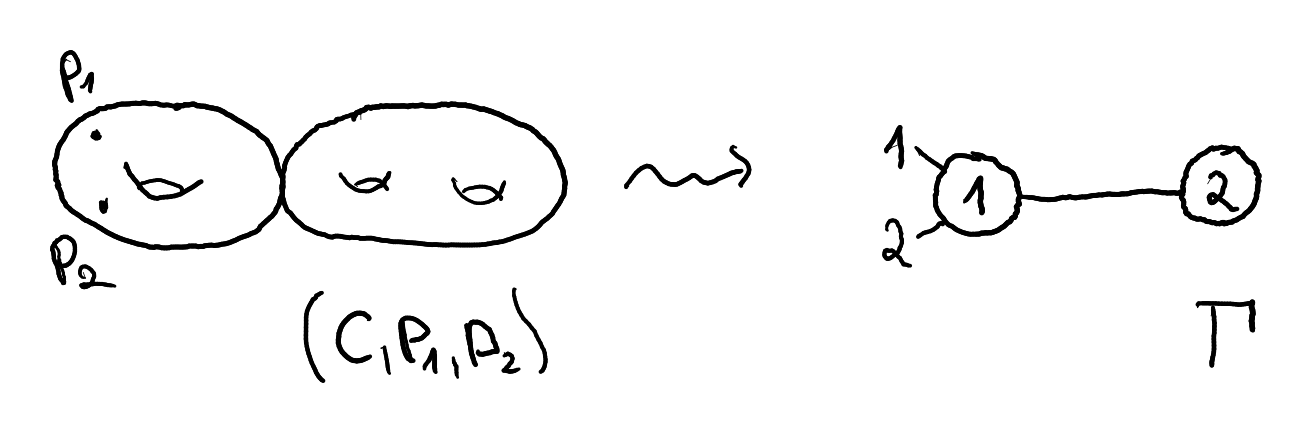

Using the function ``list_strata(g,n,r)`` you can get a list of all stable graphs with a given number ``r`` of edges.

In [5]:
# the following line makes sure that graphs are printed nicely
%display unicode_art
L = list_strata(3,2,1); L

⎡  ╭╮     ╭────╮     ╭───╮      ╭───╮     ╭───╮     ╭────╮   ⎤
⎢  34     3    4     3   4      3   4     3   4     3    4   ⎥
⎢ ╭┴┴╮   ╭┴─╮ ╭┴╮   ╭┴╮ ╭┴─╮   ╭┴╮ ╭┴╮   ╭┴╮ ╭┴╮   ╭┴─╮ ╭┴╮  ⎥
⎢ │2 │   │0 │ │3│   │1│ │2 │   │1│ │2│   │1│ │2│   │1 │ │2│  ⎥
⎢ ╰┬┬╯   ╰┬┬╯ ╰─╯   ╰─╯ ╰┬┬╯   ╰┬╯ ╰┬╯   ╰┬╯ ╰┬╯   ╰┬┬╯ ╰─╯  ⎥
⎣  12  ,  12      ,      12  ,  1   2  ,  2   1  ,  12       ⎦

Each entry of this list is of type ``StableGraph`` in ``admcycles``. To find out more about this datatype (how it is encoded), you can have a look at the **documentation** of the function. To try this, type e.g.
```
StableGraph?
```
in the cell below and run it, to see details on the implementation of stable graphs.

Often it can also be helpful to get your hands on an object of type ``StableGraph`` and use Tab-completion to inspect what kind of functions it has:

In [6]:
Gamma = L[0]

Type ``Gamma.`` and press ``Tab`` to see possible methods available for ``Gamma``:

Further ressources are the [original paper about admcycles](https://msp.org/jsag/2021/11-1/p10.xhtml) or the [online documentation](https://modulispaces.gitlab.io/admcycles/stable_graph.html).

<b>Exercise</b><br>
*Beginners:* Find out how many stable graphs there are of genus $3$ with no marked points and $2$ edges.

*Experts:* How many stable graphs are there in total in genus $3$ with no markings? How many of them are of compact type (i.e. a tree)?

<details><summary><b>Solution</b> (click to expand)</summary>

*Beginners:*
```
len(list_strata(3,0,2))
> 5
```

*Experts:*
```
sum(len(list_strata(3,0,r)) for r in range(7))
> 42
sum(1 for r in range(7) for gamma in list_strata(3,0,r) if sum(gamma.genera())==3)
> 4
```

</details>

We can use this to check that the intersection of the two divisors drawn above is illustrated correctly:
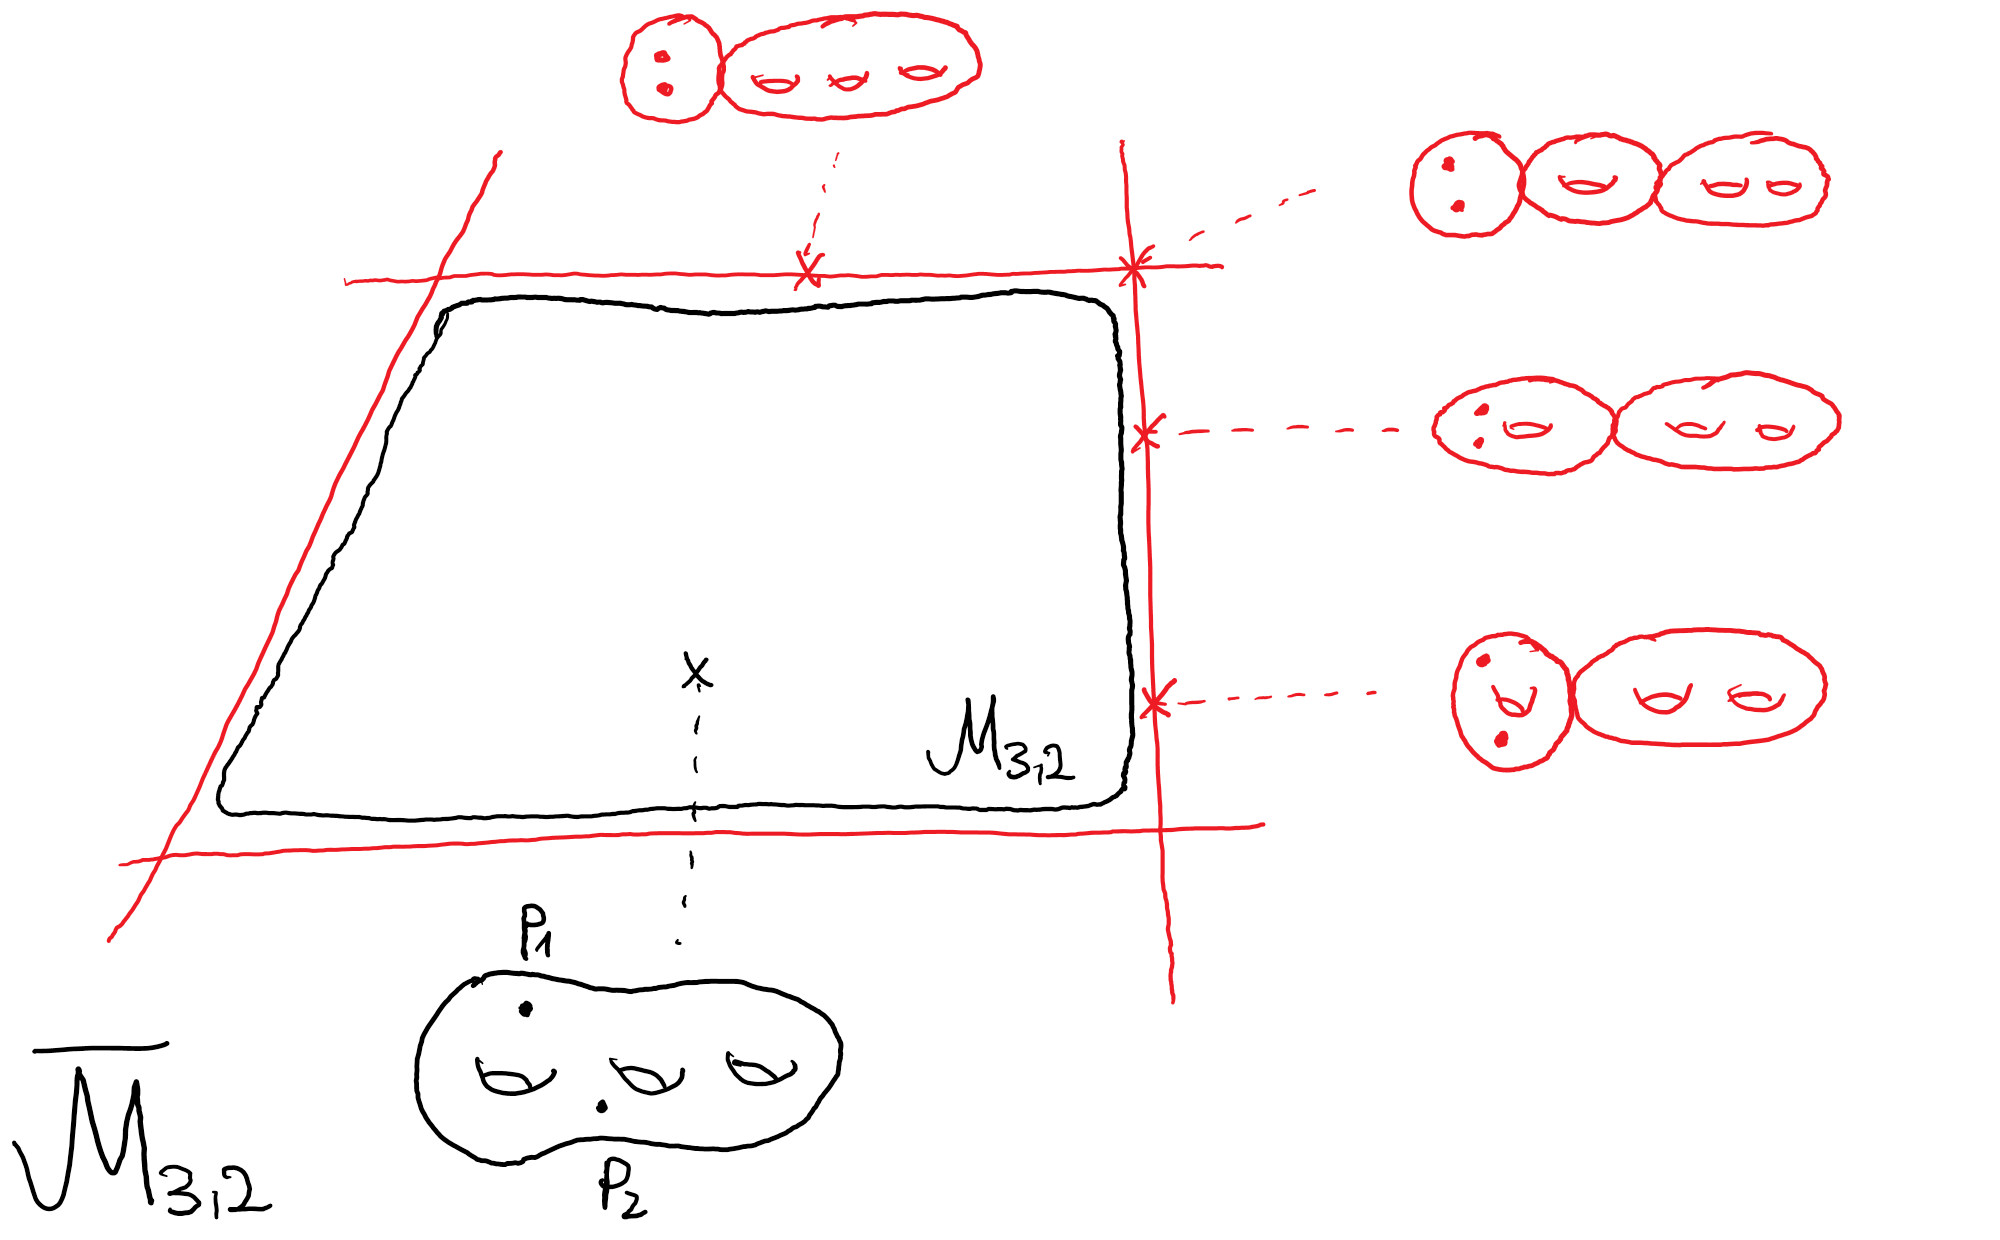

In [7]:
L = list_strata(3,2,1); L

⎡  ╭╮     ╭────╮     ╭───╮      ╭───╮     ╭───╮     ╭────╮   ⎤
⎢  34     3    4     3   4      3   4     3   4     3    4   ⎥
⎢ ╭┴┴╮   ╭┴─╮ ╭┴╮   ╭┴╮ ╭┴─╮   ╭┴╮ ╭┴╮   ╭┴╮ ╭┴╮   ╭┴─╮ ╭┴╮  ⎥
⎢ │2 │   │0 │ │3│   │1│ │2 │   │1│ │2│   │1│ │2│   │1 │ │2│  ⎥
⎢ ╰┬┬╯   ╰┬┬╯ ╰─╯   ╰─╯ ╰┬┬╯   ╰┬╯ ╰┬╯   ╰┬╯ ╰┬╯   ╰┬┬╯ ╰─╯  ⎥
⎣  12  ,  12      ,      12  ,  1   2  ,  2   1  ,  12       ⎦

In [8]:
gamma1 = L[1]; gamma2 = L[5]
(gamma1, gamma2)

⎛  ╭────╮     ╭────╮   ⎞
⎜  3    4     3    4   ⎟
⎜ ╭┴─╮ ╭┴╮   ╭┴─╮ ╭┴╮  ⎟
⎜ │0 │ │3│   │1 │ │2│  ⎟
⎜ ╰┬┬╯ ╰─╯   ╰┬┬╯ ╰─╯  ⎟
⎝  12      ,  12       ⎠

Given a stable graph $\Gamma$ with $r$ edges, we can create the associated **fundamental class**

$$
[\Gamma] \in H^{2r}(\overline{\mathcal{M}}_{g,n})
$$

using the function ``to_tautological_class()``:

In [9]:
bdiv1 = gamma1.to_tautological_class()
bdiv2 = gamma2.to_tautological_class()

In [10]:
bdiv1 * bdiv2

Graph :
 ╭────╮     
 │    │╭───╮
 3    45   6  
╭┴─╮ ╭┴┴╮ ╭┴╮ 
│0 │ │1 │ │2│ 
╰┬┬╯ ╰──╯ ╰─╯ 
 12           
             
Polynomial : 1

There are many further functions for generating interesting tautological classes, and performing natural operations with them. Instead of going into all the details, let me just give you a tour:

In [11]:
R = TautologicalRing(2,2)

### Further basic classes
* the $\kappa$-classes
$$\kappa_m = \pi_* \psi_{n+1}^{m+1} \in RH^{2m}(\overline{\mathcal{M}}_{g,n})$$
for $\pi : \overline{\mathcal{M}}_{g,n+1} \to \overline{\mathcal{M}}_{g,n}$ the **forgetful map** of the last marked point

In [12]:
(R.kappa(3)*R.kappa(2)).evaluate()

97/5760

* the $\lambda$-classes
$$\lambda_i = c_i(\mathbb{E}_{g,n}) \in RH^{2i}(\overline{\mathcal{M}}_{g,n})$$
for $\mathbb{E}_{g,n}$ the **Hodge bundle** - a vector bundle on $\overline{\mathcal{M}}_{g,n}$ with fiber
$$
\mathbb{E}_{g,n}|_{(C, p_1, \ldots, p_n)} = H^0(C, T_C^*).
$$

In [13]:
L = R.lambdaclass(1)

### Further basic operations
* comparing two cohomology classes

In [14]:
R = TautologicalRing(2,0)
R.lambdaclass(1)^2 == 2 * R.lambdaclass(2)

True

In [15]:
L1 = R.lambdaclass(1)
K1 = R.kappa(1)
(L1 - 1/12 * K1).is_zero()

False

* comparisons on open subsets of $\overline{\mathcal{M}}_{g,n}$, e.g. the locus $\mathcal{M}_{g,n}$ of **smooth** curves

In [16]:
(L1 - 1/12 * K1).is_zero(moduli='sm')

True

* expressing tautological classes in a **basis** of the tautological ring (in their given degree)

In [17]:
v1 = L1.basis_vector(); v1

(1/2, -1/4)

In [18]:
v2 = K1.basis_vector(); v2

(1, 0)

* many geometrically constructed classes, e.g. the **hyperelliptic cycle** which is the fundamental class of the locus $\overline{\mathrm{Hyp}}_{2,2}$ of curves $(C, p, q) \in \overline{\mathcal{M}}_{2,2}$ such that the hyperelliptic involution of $C$ fixes $p,q$:

In [19]:
R = TautologicalRing(2, 2)
R.hyperelliptic_cycle(2)

Graph :
     
╭──╮ 
│2 │ 
╰┬┬╯ 
 12  
             
Polynomial : -21/2*(κ₂)₀ + 7/2*(κ₁²)₀ - 9*(κ₁)₀*ψ₁ - 9*(κ₁)₀*ψ₂ + 18*ψ₁² + 17*ψ₁*ψ₂ + 18*ψ₂²
Graph :
 ╭────╮
 4    5  
╭┴─╮ ╭┴╮ 
│0 │ │2│ 
╰┬┬╯ ╰─╯ 
 12      
             
Polynomial : 21/2*(κ₁)₁ - 49/2*ψ₅
Graph :
 ╭───╮
 4   5   
╭┴╮ ╭┴─╮ 
│1│ │1 │ 
╰─╯ ╰┬┬╯ 
     12  
             
Polynomial : 7/2*(κ₁)₁ - 2*ψ₁ - 2*ψ₂ - 7/2*ψ₅

## The New: Developments during the last year
In the last 12 months many new functions and features were added to ``admcycles``. Here is a list of the highlights.

### Maintenance (Vincent Delecroix, Frédéric Chapoton, Johannes Schmitt, Johannes Schwab)
Before we get to the fun stuff, let me mention that behind the scenes a lot is happening to keep the software running!
* Move to GitLab group [``modulispaces``](https://gitlab.com/modulispaces/) & participation in [GitLab for Open Source Program](https://about.gitlab.com/solutions/open-source/join/)
* Bugfixes and code improvements (9 merge requests)
* Correction & expansion of documentation (7 merge requests)
* Publishing the [documentation online](https://modulispaces.gitlab.io/admcycles/) via GitLab pages
* Running benchmarks and continuous integration (6 merge requests)
* Code refactoring and compatibility with new Sage version (3 merge requests)

### From Les Diablerets 2022

#### [Notebooks with example calculations (Danilo Lewański, Dimitrios Mitsios, Johannes Schmitt, Johannes Schwab, ???)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/207)
Last year, several participants worked on exercises that included doing some example computation, or checking results in the literature using ``admcycles``. They wrote up the computations in the form of Jupyter notebooks (like this one) and now they are available online:
* [list of Jupyter notebooks](https://gitlab.com/modulispaces/admcycles/-/tree/master/docs/source/notebooks)
* [html version](https://modulispaces.gitlab.io/admcycles/examples.html)

They are also used to check that changes to the code of ``admcycles`` don't break any of these calculations: each time new code is introduced, some GitLab server runs all the calculations in the notebooks and verifies that the output didn't change!

#### [A presentation of the tautological ring (David Holmes)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/160)
It's now possible to get an explicit representation of a tautological ring in terms of generators and relations:

Like this we can check a result of [Faber](https://doi.org/10.2307/1971525):
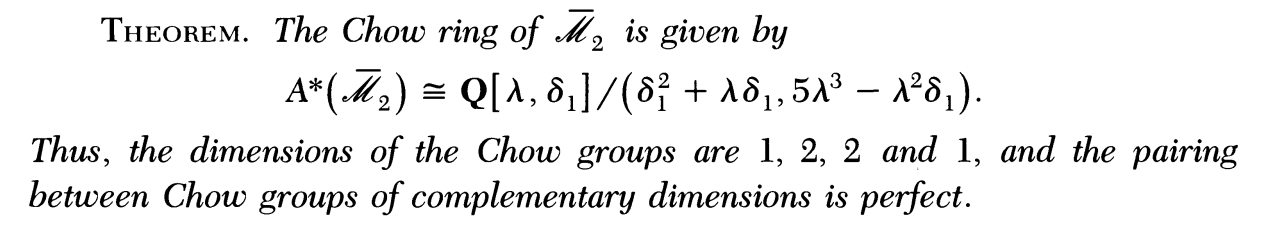

In [20]:
TR = TautologicalRing(2)
gens = (TR.lambdaclass(1), 1/2*TR.sepbdiv(1,()))  # generators lambda, delta_1 from above
I, f = TR.presentation(gens)
I

Ideal (x1^4, x0^3 - 1/5*x1^3, x0*x1 + x1^2) of Multivariate Polynomial Ring in x0, x1 over Rational Field

In [21]:
R = I.ring()
la, d1 = R.gens()
I == R.ideal([d1^2 + la*d1, 5*la^3 - la^2 * d1])

True

#### [Permutation actions on tautological classes (Matthias Hippold)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/169)
The symmetric group $S_n$ acts on $\overline{\mathcal{M}}_{g,n}$ by permuting the order of the marked points.
> E.g. the permutation $(12)$ sends $(C, p_1, p_2, p_3, \ldots, p_n)$ to $(C, p_2, p_1, p_3, \ldots, p_n)$.

This induces an action on tautological classes, which is now implemented.

In [22]:
t = psiclass(1,1,3) + 2 * psiclass(2,1,3); t

Graph :
      
╭───╮ 
│1  │ 
╰┬┬┬╯ 
 123  
             
Polynomial : ψ₁ + 2*ψ₂

In [23]:
t.permutation_action(Permutation('(1,2,3)'))

Graph :
      
╭───╮ 
│1  │ 
╰┬┬┬╯ 
 123  
             
Polynomial : ψ₂ + 2*ψ₃

There is a [proposal for a project](https://gitlab.com/modulispaces/admcycles/-/issues/112) for using this to identify a given vector space $R^d(\overline{\mathcal{M}}_{g,n})$ as an $S_n$-representation.

#### [A faster implementation of tautological relations (Thomas Wennink)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/148)
Aaron Pixton's original code for computing the list of known relations between tautological classes has been improved to run much faster and more memory efficient:

In [24]:
%time L = generating_indices.f(3,0,5,FZmethod='3spin')  # random

CPU times: user 12.5 s, sys: 78.1 ms, total: 12.6 s
Wall time: 12.6 s


In [25]:
%time L = generating_indices.f(3,0,5)  # random

CPU times: user 5.99 s, sys: 69.9 ms, total: 6.06 s
Wall time: 6.06 s


#### [New functions related to strata of differentials (Johannes Schwab, Yiu Man Wong)](https://gitlab.com/modulispaces/admcycles/-/tree/master/admcycles/diffstrata)
The **strata of differentials** $\overline{\mathcal{H}}_{g}(\mu)$ are closed subsets of $\overline{\mathcal{M}}_{g,n}$ defined by the condition that there exists a meromorphic differential form on the curve $C$ which has zeros and poles at the marked points $p_i$ of some multiplicities specified by a vector $\mu \in \mathbb{Z}^n$.

In ``admcycles`` there is a subpackage called [``diffstrata``](https://arxiv.org/abs/2006.12815) which implements many interesting functions related to these strata. Since the last meeting, there are two new such functions:

[Masur-Veech volumes of strata of holomorphic differentials](https://gitlab.com/modulispaces/admcycles/-/merge_requests/159)

In [26]:
from admcycles.diffstrata import Stratum
X = Stratum((1,3))
print(X.masur_veech_volume())

16/42525*pi^6


[Connected components of strata of meromorphic differentials](https://gitlab.com/modulispaces/admcycles/-/merge_requests/175)

In some cases the strata decompose into a disjoint union

$$
\overline{\mathcal{H}}_{g}(\mu) = \overline{\mathcal{H}}_{g}(\mu)^{\text{even}} \sqcup \overline{\mathcal{H}}_{g}(\mu)^{\text{odd}}.
$$

Now one can compute not just the whole fundamental class $[\overline{\mathcal{H}}_{g}(\mu)]$, but also the **spin class**

$$
[\overline{\mathcal{H}}_{g}(\mu)]^\text{spin} = [\overline{\mathcal{H}}_{g}(\mu)^{\text{even}}] - [\overline{\mathcal{H}}_{g}(\mu)^{\text{odd}}].
$$

In [27]:
Hbar      = Strataclass(2,1,(4,-2))
Hbar_spin = Strataclass(2,1,(4,-2),spin=True)

In [28]:
Hbar_even = 1/2*(Hbar + Hbar_spin)

This can be used to e.g. check [some conjectures](https://arxiv.org/abs/2112.04238) on these cycles.

#### [Identifying classes by their intersection numbers or boundary restrictions (Yiu Man Wong)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/164)
In many cases, a tautological class is uniquely identified by knowing
* its intersection with classes in opposite degree
* its restriction under various boundary gluing morphisms

Now it's possible to conveniently do this identification!

*Baby example:* The class $\alpha = 42 \psi_1$ on $\overline{\mathcal{M}}_{0,6}$ is uniquely determined by the property
$$
\int_{\overline{\mathcal{M}}_{0,6}} \alpha \cdot \psi^{\vec e} = 42 \cdot \binom{3}{\vec e + (2,0,0,0,0,0)}.
$$

In [29]:
R = TautologicalRing(0,6)
def kpfun(kap, psi, cl):
    if kap:
        return None
    b = vector(ZZ,[psi.get(i,0) for i in range(1,7)])+vector([1,0,0,0,0,0])
    return 42*factorial(3)/prod(factorial(bi) for bi in b)

cl = R.identify_class(1, kappapsifunction=kpfun)
cl == 42*R.psi(1)

True

#### [Online database of Faber-Zagier relations (Matthias Hippold, Johannes Schwab, Thomas Wennink, Vincent Delecroix)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/168)
Calculating the Faber-Zagier relations between generators of some group $R^d(\overline{\mathcal{M}}_{g,n})$ can be a very time- and memory-intensive task. 
The latest version of admcycles includes an automated [online lookup](https://gitlab.com/modulispaces/relations-database) of pre-calculated tautological relations (see [the list of available cases](https://modulispaces.gitlab.io/relations-database/index.html)).

By default, if you attempt a calculation that needs tautological relations, the program will first try to look them up in your local storage (in the folder ``.sage/admcycles``). If not found there, the program will check the above database and download the relations to your computer in case they are available. If this fails as well, the program will then calculate the relations itself (and store them for the future).

In [30]:
D = DR_cycle(4,[],d=5)

The following check would previously have taken at least 40 seconds to complete:

In [31]:
D == 0

True

For a more impressive result (but too long to show in a presentation): the following check takes a few minutes now, but would have crashed this notebook on most laptops in the previous version:

In [32]:
D = DR_cycle(4,[7],d=5) # long time

In [33]:
D == 0

True

### Further improvements of the last year

#### [Witten's r-spin class (Felix Janda, Aaron Pixton, Johannes Schmitt)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/90)
One can now compute a certain cohomology class, called **Witten's r-spin class** on $\overline{\mathcal{M}}_{g,n}$. It has conjectural relations to the strata of differentials above, which can be verified in many new examples.

In [34]:
H1 = Wittenrspin(2, (2,))
H2 = Strataclass(2, 1, (2,))
H1 == H2

True

#### Nicer printing of [stable graphs](https://gitlab.com/modulispaces/admcycles/-/merge_requests/50) and [tautological classes](https://gitlab.com/modulispaces/admcycles/-/merge_requests/183) (Frédéric Chapoton, Johannes Schmitt)

In [35]:
# before
D = DR_cycle(3,())
print(repr(D))

Graph :      [2] [[2, 3]] [(2, 3)]
Polynomial : -1/2016*psi_2^2 - 1/2016*psi_2*psi_3

Graph :      [1] [[3, 4, 5, 6]] [(3, 4), (5, 6)]
Polynomial : -1/5760*psi_3

Graph :      [1, 1] [[3, 5], [4, 6]] [(3, 4), (5, 6)]
Polynomial : 1/672*psi_3

Graph :      [0] [[4, 5, 6, 7, 8, 9]] [(4, 5), (6, 7), (8, 9)]
Polynomial : -1/82944

Graph :      [0, 1] [[4, 6, 7, 8], [5, 9]] [(4, 5), (6, 7), (8, 9)]
Polynomial : 1/5760

Graph :      [0, 1] [[4, 6, 8], [5, 7, 9]] [(4, 5), (6, 7), (8, 9)]
Polynomial : 13/30240


In [36]:
# after
%display unicode_art
D

Graph :
 ╭╮
 23  
╭┴┴╮ 
│2 │ 
╰──╯ 
     
             
Polynomial : -1/2016*ψ₂² - 1/2016*ψ₂*ψ₃
Graph :
 ╭╮  
 ││╭╮
 3456  
╭┴┴┴┴╮ 
│1   │ 
╰────╯ 
       
             
Polynomial : -1/5760*ψ₃
Graph :
 ╭────╮ 
 │╭────╮
 35   46  
╭┴┴╮ ╭┴┴╮ 
│1 │ │1 │ 
╰──╯ ╰──╯ 
          
             
Polynomial : 1/672*ψ₃
Graph :
 ╭╮    
 ││╭╮  
 ││││╭╮
 456789  
╭┴┴┴┴┴┴╮ 
│0     │ 
╰──────╯ 
         
             
Polynomial : -1/82944
Graph :
 ╭──────╮ 
 │╭╮    │ 
 │││╭────╮
 4678   59  
╭┴┴┴┴╮ ╭┴┴╮ 
│0   │ │1 │ 
╰────╯ ╰──╯ 
            
             
Polynomial : 1/5760
Graph :
 ╭─────╮  
 │╭─────╮ 
 ││╭─────╮
 468   579  
╭┴┴┴╮ ╭┴┴┴╮ 
│0  │ │1  │ 
╰───╯ ╰───╯ 
            
             
Polynomial : 13/30240

There is a [proposal for a project](https://gitlab.com/modulispaces/admcycles/-/issues/106) aiming to make these pictures even nicer (e.g. by writing code for Tikz in LaTeX to draw these graphs).

#### [Socle evaluations for smaller moduli (Aaron Pixton, Johannes Schmitt)](https://gitlab.com/modulispaces/admcycles/-/merge_requests/210)
For $g>0$, the tautological rings of the spaces $\mathcal{M}_{g,n}^\mathrm{ct}$ of **compact type curves** (all nodes of $C$ are separating) and **rational tail** curves $\mathcal{M}_{g,n}^\mathrm{rt}$ (C has a component of genus $g$), satisfy that the maps
\begin{align*}
R^{2g-3+n}(\mathcal{M}_{g,n}^\mathrm{ct}) \to \mathbb{Q}, &\quad \alpha \mapsto \int_{\overline{\mathcal{M}}_{g,n}} \lambda_g \cdot \alpha\,,\\
R^{g-2+n}(\mathcal{M}_{g,n}^\mathrm{rt}) \to \mathbb{Q}, & \quad \alpha \mapsto \int_{\overline{\mathcal{M}}_{g,n}} \lambda_g \lambda_{g-1} \cdot \alpha\,,
\end{align*}
are isomorphisms. The groups $R^{2g-3+n}(\mathcal{M}_{g,n}^\mathrm{ct})$ and $R^{g-2+n}(\mathcal{M}_{g,n}^\mathrm{rt})$ are then called the **socle** of the corresponding tautological rings.

The evaluation maps above were implemented by Aaron Pixton, and are now (finally) available in ``admcycles``:

In [37]:
R = TautologicalRing(5,1,moduli='ct')
(R.psi(1)^8).evaluate()

73/3503554560

In [38]:
R = TautologicalRing(3,3,moduli='ct')
D = R.double_ramification_cycle([1,2,-3])
(D*R.psi(1)^3).evaluate()

112751/2903040

In [39]:
R = TautologicalRing(6,0,moduli='ct')
M = R.pairing_matrix(5, basis=True)

In [40]:
M

72 x 71 dense matrix over Rational Field

In [41]:
M.rank()

71

In [42]:
M.kernel()

Vector space of degree 72 and dimension 1 over Rational Field
Basis matrix:
1 x 72 dense matrix over Rational Field

In [43]:
v = M.kernel().basis()[0]; v

(1, -9737489678999241670098292919/312449404133119063852715124368, -1290937060701802574266862201/117168526549919648944768171638, -367300780669544204232817447/234337053099839297889536343276, -449908856784012710401159937/624898808266238127705430248736, 259124250376307588908616575/937348212399357191558145373104, -14907189454047812226124825/1874696424798714383116290746208, 1636319691972067296224393973699/159661645512023841628737428552048, -25884012111991124023770155029/39915411378005960407184357138012, -57240361441778291513744720043/319323291024047683257474857104096, -1761627711520815867881004945/159661645512023841628737428552048, 929065237927745863982815583/319323291024047683257474857104096, 592888134744512316615371817574/89809675600513410916164803560527, -25837300119516109280728507798/29936558533504470305388267853509, 2950570281226805336450829812/89809675600513410916164803560527, 54656278087593325291534332272/9978852844501490101796089284503, -7857761345628829056072421888/99788528445014901

In [44]:
a = R.from_basis_vector(v,5)

The class ``a`` above is an element of the tautological ring pairing to zero with any class in opposite degree!

# Thanks for your attention!